In [1]:
from pathlib import Path

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("grayscale")

In [4]:
from sklearn.datasets import make_circles

# Circles Example

In [5]:
data, target = make_circles(n_samples=500, noise=.05, factor=.5)

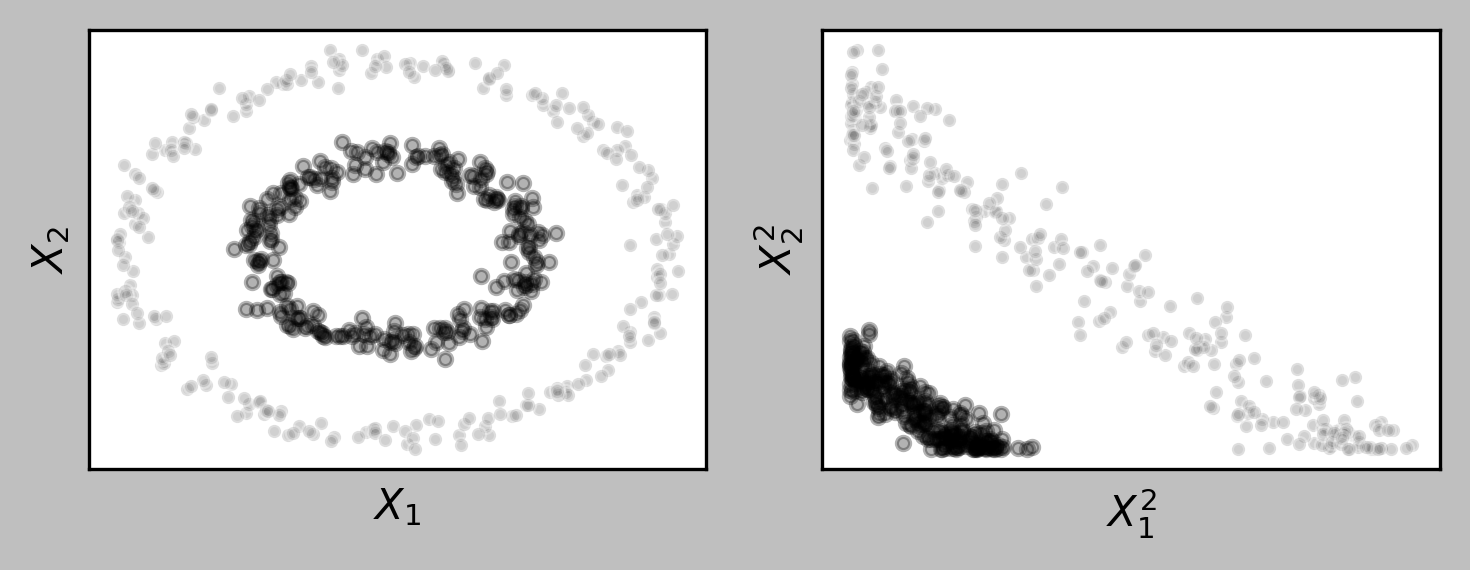

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(5, 2), dpi=300)

c0 = data[np.where(target > 0)]
c1 = data[np.where(~(target > 0))]

ax[0].scatter(c0[:, 0], c0[:, 1], alpha=.3, s=10, edgecolors="black")
ax[0].scatter(c1[:, 0], c1[:, 1], alpha=.3, s=10, edgecolors="white")

ax[1].scatter(c0[:, 0]**2, c0[:, 1]**2, alpha=.3, s=10, edgecolors="black")
ax[1].scatter(c1[:, 0]**2, c1[:, 1]**2, alpha=.3, s=10, edgecolors="white")

ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticks([])

ax[0].set_xlabel("$X_1$")
ax[0].set_ylabel("$X_2$")

ax[1].set_xlabel("$X_1^2$")
ax[1].set_ylabel("$X_2^2$")

plt.tight_layout()
plt.savefig("circles.png")

# Results

In [7]:
df = pd.concat([pd.read_csv(elem) for elem in Path("results").glob("*.csv")]).iloc[:, 1:]
df.head()

,dataset,alpha,acc_train,acc_test,best_loss,iterations,gg_neigh_index,gg_border_perc,silhouette_score,sil_neg_samples_score,calinski_harabasz_score,davies_bouldin_score
0,synth_linear,0.398107,0.968597,0.959350,0.092375,256,0.949058,0.043266,0.718362,0.031403,7297.341736,0.353626
1,cred_ger,0.398107,1.000000,0.750000,0.076726,256,0.998571,0.002857,0.782672,0.000000,3729.976870,0.284301
2,cred_aus,0.251189,0.997930,0.826087,0.118373,256,0.993789,0.008282,0.747925,0.002070,2660.837999,0.363448
3,synth_blobs,0.025119,0.891835,0.856911,0.259462,256,0.830643,0.290300,0.165517,0.132589,234.922557,2.434579
4,synth_linear,1.000000,0.967900,0.962602,0.110772,256,0.954641,0.047453,0.715755,0.032100,7169.916977,0.356030


In [8]:
df["acc_diff"] = (df["acc_test"] - df["acc_train"]).abs()

In [9]:
df["dataset"].unique()

array(['synth_linear', 'cred_ger', 'cred_aus', 'synth_blobs', 'heart',
       'synth_moons', 'sonar', 'breast_coimbra'], dtype=object)

In [10]:
df.columns

Index(['dataset', 'alpha', 'acc_train', 'acc_test', 'best_loss', 'iterations',
       'gg_neigh_index', 'gg_border_perc', 'silhouette_score',
       'sil_neg_samples_score', 'calinski_harabasz_score',
       'davies_bouldin_score', 'acc_diff'],
      dtype='object')

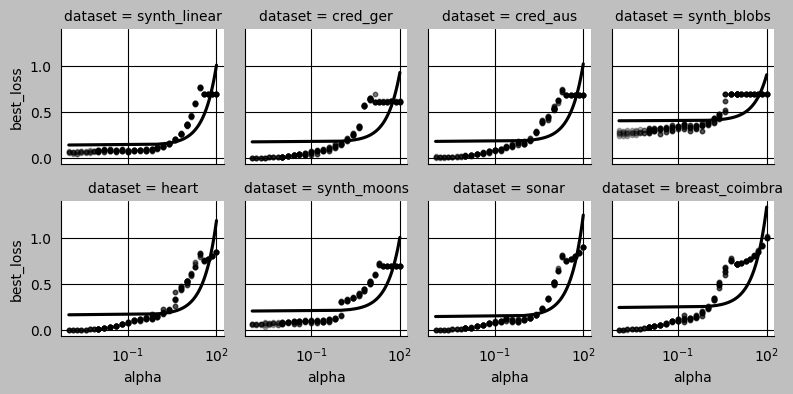

In [11]:
sns.lmplot(
    data=df, x="alpha", y="best_loss", col="dataset",
    col_wrap=4, palette="muted", ci=None,
    height=2, scatter_kws={"s": 10, "alpha": .3},
)
plt.xscale("log")

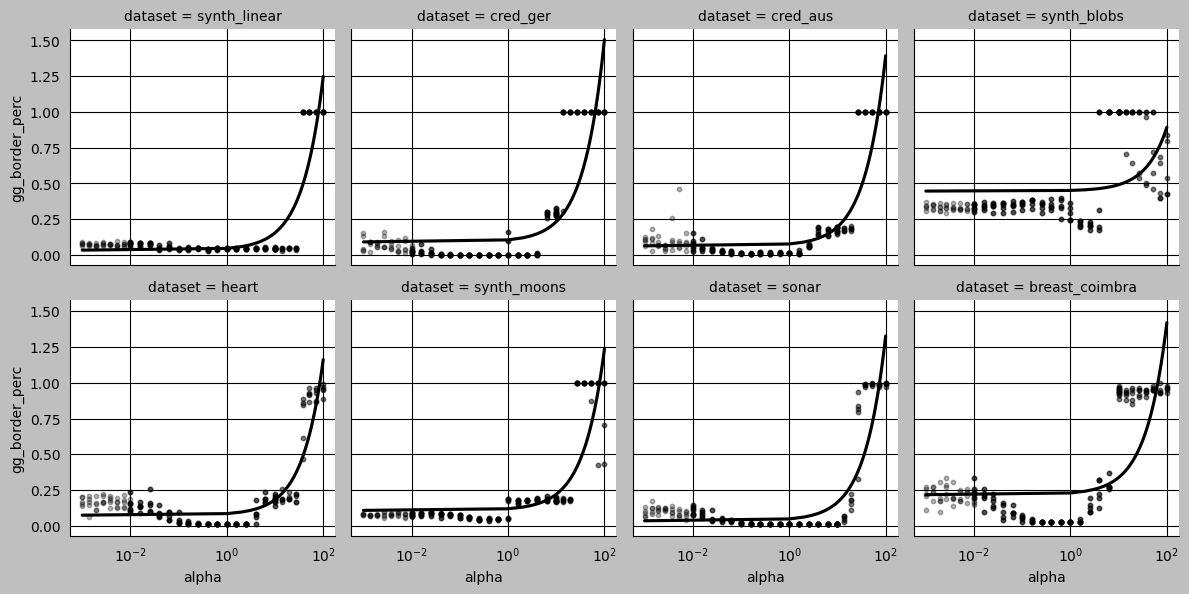

In [12]:
sns.lmplot(
    data=df, x="alpha", y="gg_border_perc", col="dataset",
    col_wrap=4, palette="muted", ci=None,
    height=3, scatter_kws={"s": 10, "alpha": .3},
)
plt.xscale("log")

In [13]:
metrics = [
    "silhouette_score", "sil_neg_samples_score",
    "calinski_harabasz_score", "davies_bouldin_score",
    "gg_neigh_index", "gg_border_perc",
]

In [24]:
aux = list()
for cdt in df["dataset"].unique():
    aux.append(
        df[df["dataset"] == cdt]
        .corr(numeric_only=True)
        [["alpha", "acc_diff"]]
        .loc[metrics]
        .reset_index()
        .rename(columns={"index": "metrics"})
        .assign(dataset=cdt)
    )
corrs = pd.concat(aux)

In [25]:
corrs.pivot(columns="dataset", index="metrics", values="alpha")

dataset,breast_coimbra,cred_aus,cred_ger,heart,sonar,synth_blobs,synth_linear,synth_moons
metrics,,,,,,,,
calinski_harabasz_score,-0.595255,-0.049358,-0.417095,-0.686911,-0.646121,0.447298,-0.083179,0.344548
davies_bouldin_score,0.765548,-0.075154,-0.148585,0.932796,0.941641,-0.341563,-0.072617,-0.324531
gg_border_perc,0.712145,0.882794,0.812200,0.913382,0.888329,0.342011,0.887290,0.826224
gg_neigh_index,-0.700123,-0.870074,-0.746469,-0.808796,-0.915612,-0.345283,-0.883603,-0.789365
sil_neg_samples_score,0.745609,0.855292,0.804472,0.769144,0.917006,0.556125,0.825537,0.808182
silhouette_score,-0.695259,-0.876944,-0.751760,-0.873602,-0.912461,-0.461728,-0.892811,-0.815564


In [26]:
print(corrs.pivot(columns="dataset", index="metrics", values="alpha").round(decimals=3).transpose().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
metrics &  calinski\_harabasz\_score &  davies\_bouldin\_score &  gg\_border\_perc &  gg\_neigh\_index &  sil\_neg\_samples\_score &  silhouette\_score \\
dataset        &                          &                       &                 &                 &                        &                   \\
\midrule
breast\_coimbra &                   -0.595 &                 0.766 &           0.712 &          -0.700 &                  0.746 &            -0.695 \\
cred\_aus       &                   -0.049 &                -0.075 &           0.883 &          -0.870 &                  0.855 &            -0.877 \\
cred\_ger       &                   -0.417 &                -0.149 &           0.812 &          -0.746 &                  0.804 &            -0.752 \\
heart          &                   -0.687 &                 0.933 &           0.913 &          -0.809 &                  0.769 &            -0.874 \\
sonar          &                   -0.646 &      

/tmp/ipykernel_27935/1462702729.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(corrs.pivot(columns="dataset", index="metrics", values="alpha").round(decimals=3).transpose().to_latex())


In [27]:
print(corrs.pivot(columns="dataset", index="metrics", values="acc_diff").round(decimals=3).transpose().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
metrics &  calinski\_harabasz\_score &  davies\_bouldin\_score &  gg\_border\_perc &  gg\_neigh\_index &  sil\_neg\_samples\_score &  silhouette\_score \\
dataset        &                          &                       &                 &                 &                        &                   \\
\midrule
breast\_coimbra &                    0.861 &                -0.819 &          -0.846 &           0.884 &                 -0.886 &             0.900 \\
cred\_aus       &                    0.601 &                -0.133 &          -0.736 &           0.865 &                 -0.702 &             0.832 \\
cred\_ger       &                    0.799 &                -0.297 &          -0.879 &           0.978 &                 -0.854 &             0.970 \\
heart          &                    0.860 &                -0.733 &          -0.689 &           0.898 &                 -0.915 &             0.880 \\
sonar          &                    0.595 &      

/tmp/ipykernel_27935/1654121656.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(corrs.pivot(columns="dataset", index="metrics", values="acc_diff").round(decimals=3).transpose().to_latex())


In [16]:
df.corr(numeric_only=True)[["alpha"]].loc[metrics]

,alpha
silhouette_score,-0.664430
sil_neg_samples_score,0.666654
calinski_harabasz_score,0.007572
davies_bouldin_score,0.267887
gg_neigh_index,-0.693635
gg_border_perc,0.739019


---